# **Week Six Assignment: Knock Airport Weather**

This assignment plots the following from weather readings in Knock Airport: 
- Temperature 
- Mean Temperature Each Day 
- Mean Temperature for Each Month
- Windspeed 
- Rolling Windspeed (Over 24 Hours)
- Max Windspeed Each Day 
- Monthly Mean of the Daily Max Windspeeds

**Auther: Brianne McGrath**

____

## **Loading Data, Inspection and Filtering**

In [1]:
# import necessary libraries 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data set 
url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'
df = pd.read_csv(url, skiprows=23, low_memory=False) #skipped top rows with additional information 


In [3]:
# inspection of data set
df.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


___

In [4]:
# keeping what we need 

df_filtered = df[['date','temp', 'wdsp']].copy()
df_filtered.head()

,date,temp,wdsp
0,10-apr-1996 14:00,11.5,0
1,31-jul-1996 08:00,11.5,0
2,31-jul-1996 09:00,11.6,0
3,31-jul-1996 10:00,12.9,0
4,31-jul-1996 11:00,14.5,0


In [5]:
# checking for missing values in windspeed

missing_wdsp = df_filtered[df_filtered['wdsp']==0]
missing_wdsp_count = missing_wdsp.shape[0]
print(missing_wdsp_count)

0


In [6]:
# converting string values - had an error previously 
df_filtered['date'] = df_filtered['date'].apply(
    lambda x: datetime.strptime(x, '%d-%b-%Y %H:%M') if isinstance(x, str) else x
)

# check the result
df_filtered.head()


,date,temp,wdsp
0,1996-04-10 14:00:00,11.5,0
1,1996-07-31 08:00:00,11.5,0
2,1996-07-31 09:00:00,11.6,0
3,1996-07-31 10:00:00,12.9,0
4,1996-07-31 11:00:00,14.5,0


In [7]:
# checking date range
date_min = df_filtered['date'].min()
date_max = df_filtered['date'].max()

print("Start Date:",date_min)
print("End Date:",date_max)

Start Date: 1996-04-10 14:00:00
End Date: 2024-12-01 00:00:00


___

## **Temperature**

### **Temperature Over Time**

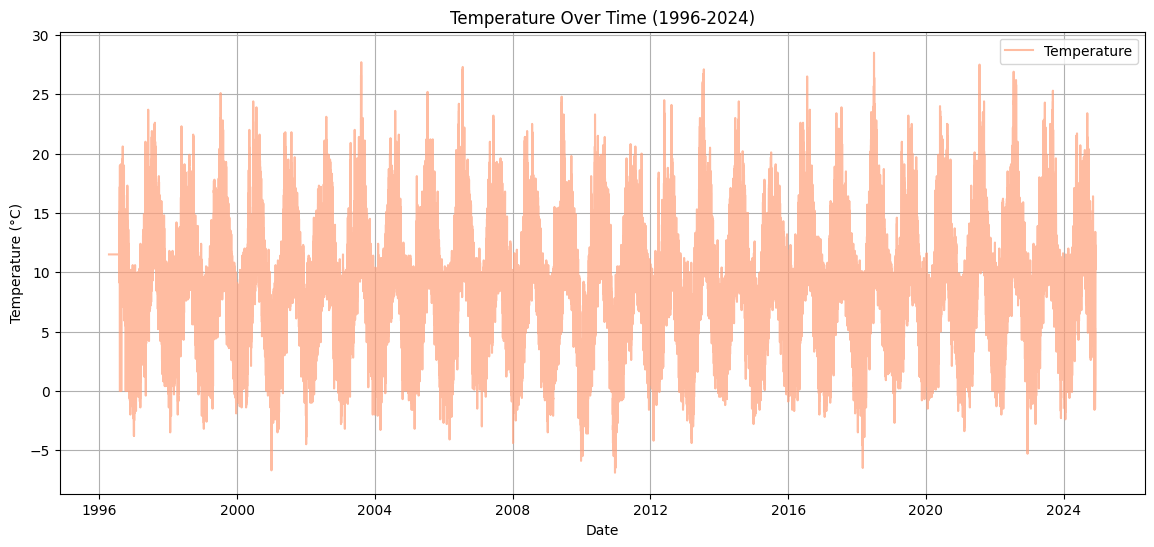

In [8]:
#temperature over time
plt.figure(figsize=(14,6))
plt.plot(df_filtered['date'], df_filtered['temp'], label='Temperature', color='lightsalmon', alpha=0.7)
plt.title('Temperature Over Time (1996-2024)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


### **Mean Temperature - Each Day**

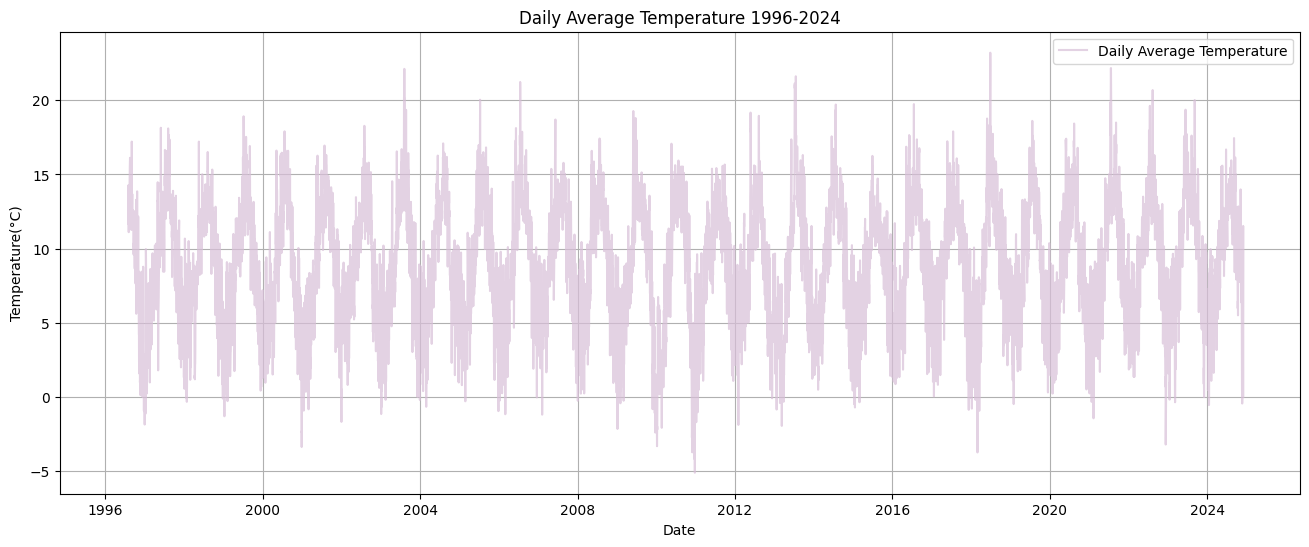

In [9]:
# resample by day and plot mean
daily_avg_temp = df_filtered.resample('D', on='date')['temp'].mean()

plt.figure(figsize=(16,6))
plt.plot(daily_avg_temp.index, daily_avg_temp, color='thistle', label='Daily Average Temperature', alpha=0.7)
plt.title('Daily Average Temperature 1996-2024')
plt.xlabel('Date')
plt.ylabel('Temperature(°C)')
plt.legend()
plt.grid(True)
plt.show()

### **Mean Temperature - Each Month**

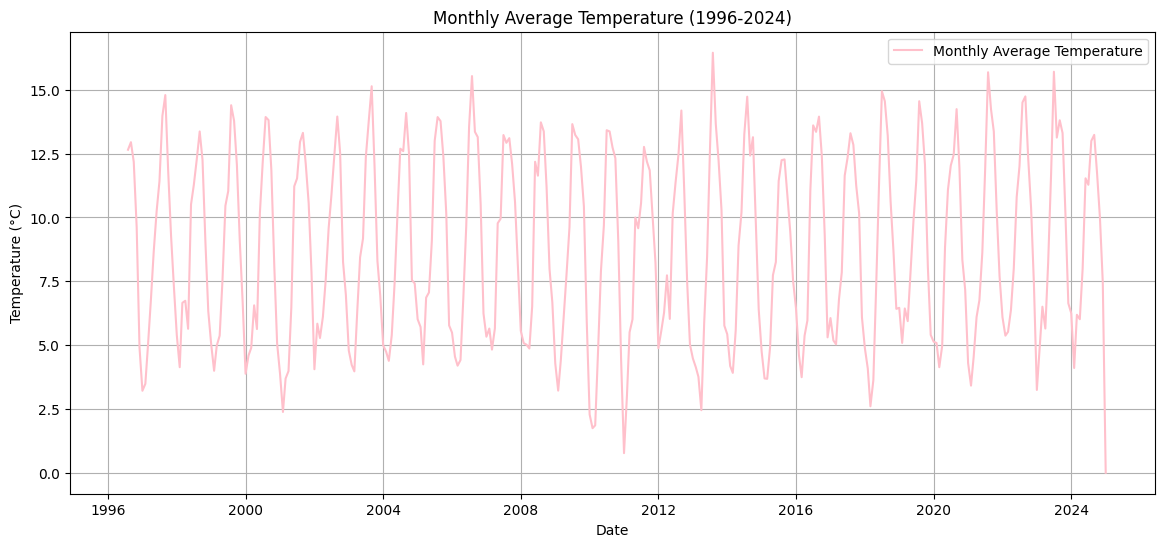

In [10]:
# resample data by month and plot mean
monthly_avg_temp = df_filtered.resample('M', on='date')['temp'].mean()

plt.figure(figsize=(14,6))
plt.plot(monthly_avg_temp.index, monthly_avg_temp, label='Monthly Average Temperature', color='pink', alpha=1)
plt.title('Monthly Average Temperature (1996-2024)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

___

## **Windspeed**

In [11]:
#checking wdsp type - received error when trying to plot
print(df_filtered['wdsp'].dtype)
print(df_filtered['wdsp'].unique())

object
['0' '6' '8' '9' '7' '11' '13' '12' '14' '10' ' ' '4' '5' '3' '2' '15'
 '16' '17' '18' '19' '1' '20' '23' '21' '22' '24' '25' '28' '26' '29' '31'
 '32' '35' '33' '27' '30' '39' '37' '36' '38' '34' '42' '49' '50' '48'
 '43' '40']


In [12]:
#converting to numeric so we can plot
df_filtered['wdsp'] = pd.to_numeric(df_filtered['wdsp'], errors='coerce')

### **Windspeed Over Time**

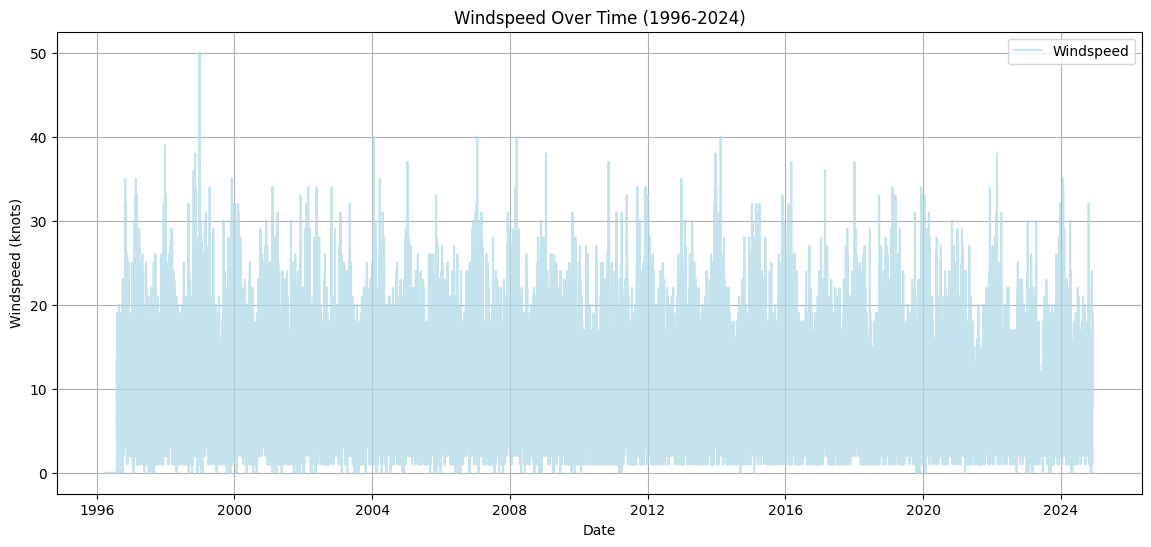

In [13]:
#windspeed over time
plt.figure(figsize=(14,6))
plt.plot(df_filtered['date'], df_filtered['wdsp'], label='Windspeed', color='lightblue', alpha=0.7)
plt.title('Windspeed Over Time (1996-2024)')
plt.xlabel('Date')
plt.ylabel('Windspeed (knots)')
plt.legend()
plt.grid(True)
plt.show()


### **Rolling Windspeed (Over 24 Hours)**

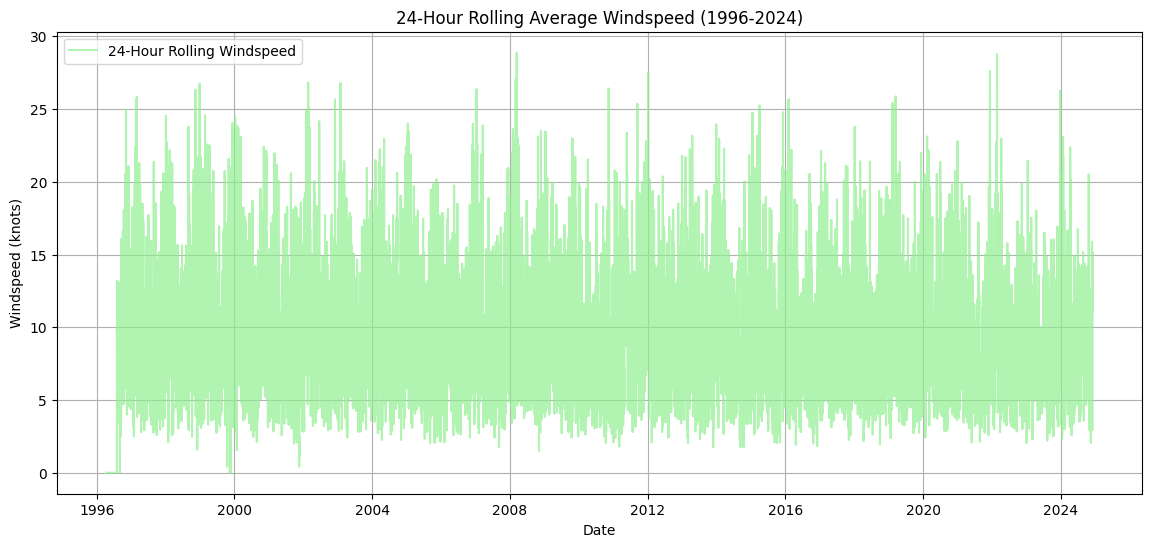

In [14]:
# rolling average of windspeed (24-hour window)
df_filtered['rolling_wdsp'] = df_filtered['wdsp'].rolling(window=24, min_periods=1).mean()

plt.figure(figsize=(14,6))
plt.plot(df_filtered['date'], df_filtered['rolling_wdsp'], label='24-Hour Rolling Windspeed', color='lightgreen', alpha=0.7)
plt.title('24-Hour Rolling Average Windspeed (1996-2024)')
plt.xlabel('Date')
plt.ylabel('Windspeed (knots)')
plt.legend()
plt.grid(True)
plt.show()

### **Max Windspeed Each Day**

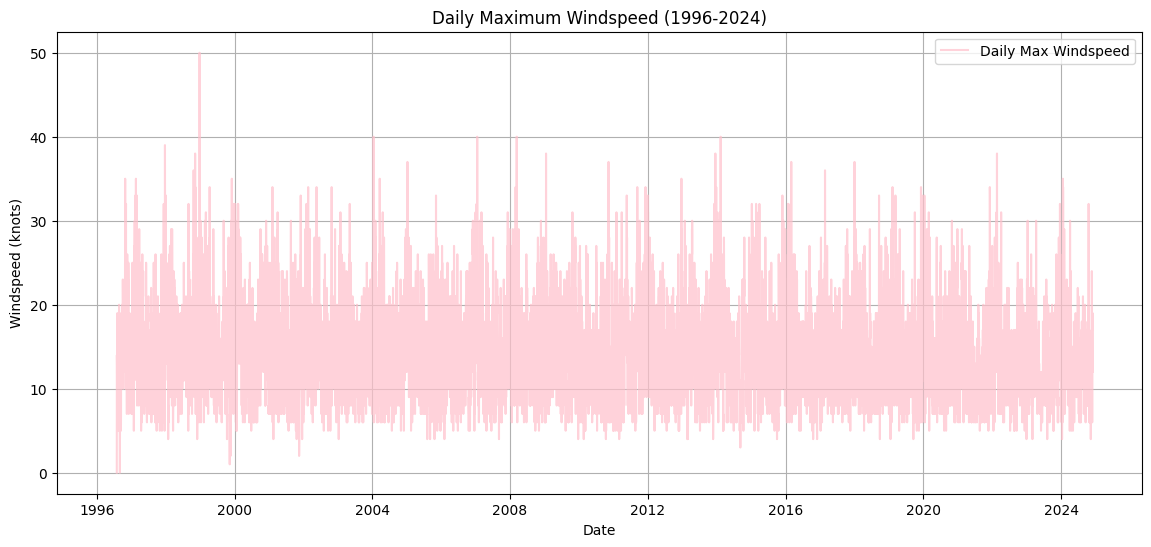

In [15]:
# daily maximum windspeed
daily_max_wdsp = df_filtered.resample('D', on='date')['wdsp'].max()

plt.figure(figsize=(14,6))
plt.plot(daily_max_wdsp.index, daily_max_wdsp, label='Daily Max Windspeed', color='pink', alpha=0.7)
plt.title('Daily Maximum Windspeed (1996-2024)')
plt.xlabel('Date')
plt.ylabel('Windspeed (knots)')
plt.legend()
plt.grid(True)
plt.show()

### **Monthly Mean of the Daily Max Windspeeds**

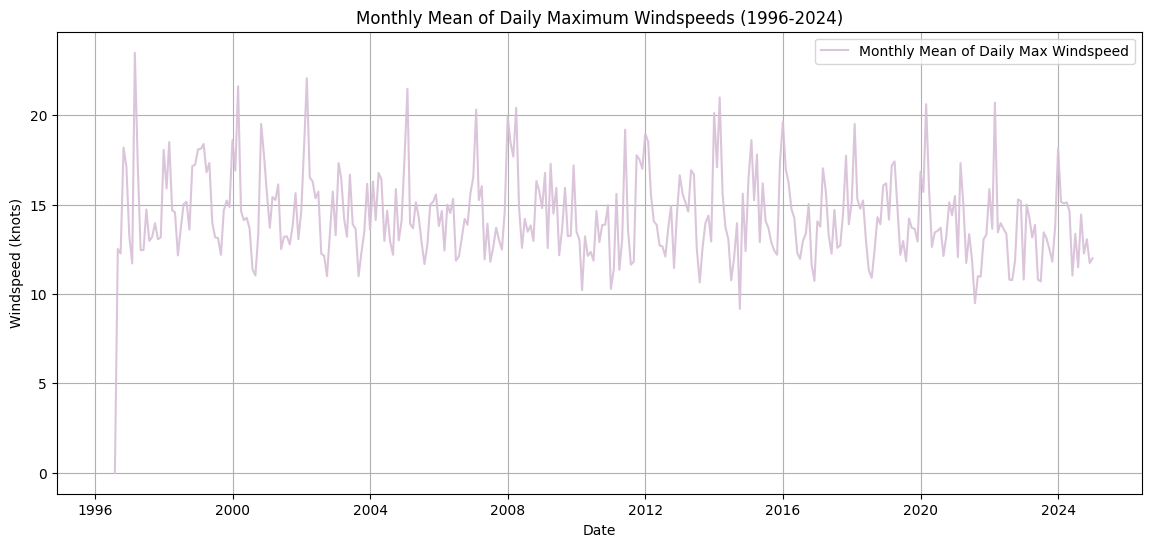

In [16]:
# monthly mean of daily maximum windspeeds
monthly_mean_daily_max_wdsp = daily_max_wdsp.resample('M').mean()

plt.figure(figsize=(14,6))
plt.plot(monthly_mean_daily_max_wdsp.index, monthly_mean_daily_max_wdsp, label='Monthly Mean of Daily Max Windspeed', color='thistle', alpha=0.9)
plt.title('Monthly Mean of Daily Maximum Windspeeds (1996-2024)')
plt.xlabel('Date')
plt.ylabel('Windspeed (knots)')
plt.legend()
plt.grid(True)
plt.show()

___
## **References:**
- https://www.javatpoint.com/how-to-skip-rows-while-reading-csv-file-using-pandas (Skipping rows when reading in csv)
- https://realpython.com/pandas-dataframe/#working-with-time-series (Time Series)
- https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html (Datetime)
- https://stackoverflow.com/questions/52633719/syntax-to-use-df-apply-with-datetime-strptime (Converting String to Date)
- https://www.geeksforgeeks.org/python-pandas-dataframe-rolling/ (Rolling Averages)
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html (Pandas Resampling)
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html (Pandas Max)
- https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options (Troubleshooting for error when loading data set)
---

## **END**